In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')
sns.set_context('poster')



In [4]:
dataset_path = Path('/Users/kaipak/Datasets/msl-labeled-data-set-v2.1/')
df_train = pd.read_csv(dataset_path / 'train-set-v2.1.txt', names=['img', 'class'], sep=' ')
df_val   = pd.read_csv(dataset_path / 'val-set-v2.1.txt', names=['img', 'class'], sep=' ')
df_test  = pd.read_csv(dataset_path / 'test-set-v2.1.txt', names=['img', 'class'], sep=' ')
df_label = pd.read_csv(dataset_path / 'class_map.csv', names=['class', 'label'])

df_tr = (
    df_train.merge(df_label, how='left', on='class').groupby(by='label').
    size().to_frame('Images').reset_index()
)
df_va = (
    df_val.merge(df_label, how='left', on='class').groupby(by='label').
    size().to_frame('Images').reset_index()
)
df_te = (
    df_test.merge(df_label, how='left', on='class').groupby(by='label').
    size().to_frame('Images').reset_index()
)

In [5]:
def dataset_plt(df, ax):
    bplot = sns.barplot(data=df, y='label', x='Images', orient='h')
    return bplot

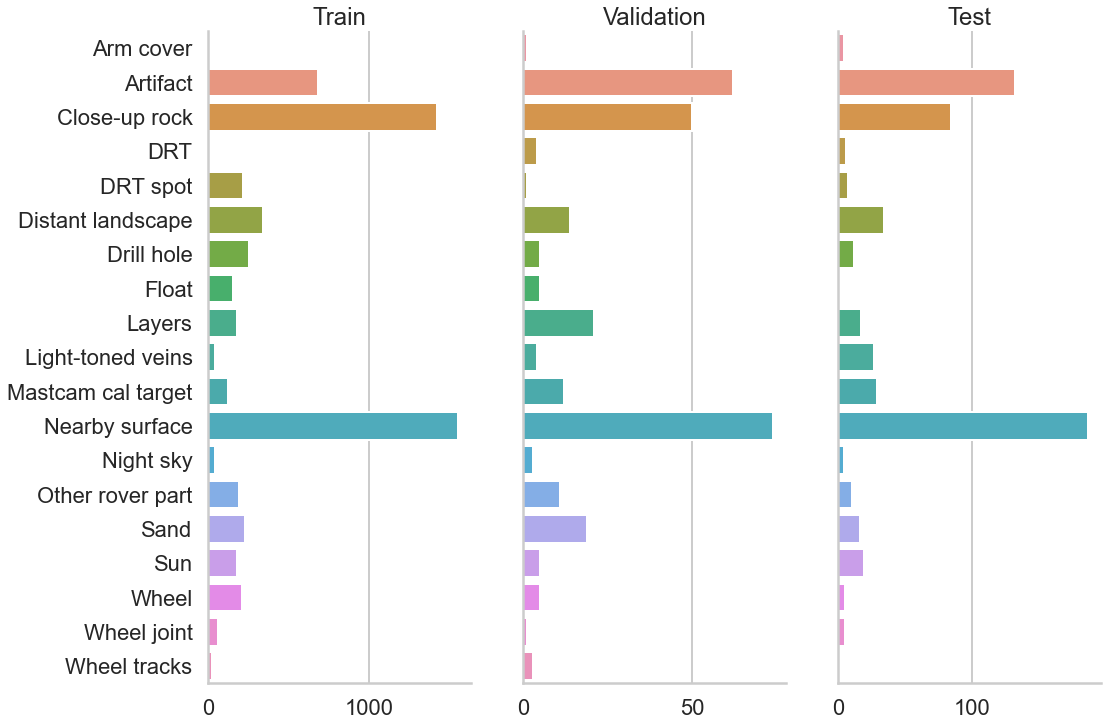

In [8]:
sns.set(font_scale=2.5)
sns.set_style('whitegrid')
sns.set_context('poster')
myfig, axes = plt.subplots(figsize=(16, 12), nrows=1, ncols=3, sharey=True)

b1 = sns.barplot(data=df_tr, y='label', x='Images', orient='h', ax=axes[0])
b2 = sns.barplot(data=df_va, y='label', x='Images', orient='h', ax=axes[1])
b3 = sns.barplot(data=df_te, y='label', x='Images', orient='h', ax=axes[2])

sns.despine(ax=axes[0], left=False)
sns.despine(ax=axes[1], left=False)
sns.despine(ax=axes[2], left=False)

for key, val in {b1: 'Train', b2: 'Validation', b3: 'Test'}.items():
    key.set(ylabel=None)
    key.set(title=val)
    key.set(xlabel=None)

plt.savefig('/Users/kaipak/Desktop/msl2.1_class_dist.png', dpi=300, bbox_inches='tight')

In [7]:
ax

NameError: name 'ax' is not defined